In [1]:
import numpy as np
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Polygon
import geopandas as gpd

import os

import matplotlib.dates as mdates

import warnings
warnings.filterwarnings("ignore")

In [5]:
track = pd.read_excel("D:/PAPERBANJIR/EXCEL PROPERTI/raw14_00_16_12.xlsx", sheet_name="graph")

In [6]:
def create_polygon(df):
    polygons = []
    for _, row in df.iterrows():
        if isinstance(row['geometry'], str):
            coords = [tuple(map(float, point.split())) for point in row['geometry'].split(',')]
            polygon = Polygon(coords)
            polygons.append(polygon)
    return polygons

In [7]:
track

,geometry,time,itime,dtime,mcs_id,mcs_class,number,area(km2),eccentricity,mean_pr
0,"106.44999694824219 -4.9805833988305555, 108.1...",2017-07-15 14:00:00,38,0.041667,95,CCC,31,637651.915121,0.936490,1.134769
1,"106.05000305175781 -5.419340283538733, 107.74...",2017-07-15 16:00:00,40,0.041667,95,CCC,34,105581.552405,0.786706,2.014789
2,"105.44999694824219 -6.1730200935548165, 105.6...",2017-07-15 17:00:00,41,0.041667,95,CCC,35,148147.648219,0.731530,1.967899
3,"105.25 -6.329649806594014, 107.25 -5.11663612...",2017-07-15 18:00:00,42,0.041667,95,CCC,36,295215.296813,0.865227,1.792939
4,"104.94999694824219 -6.609280061776039, 107.05...",2017-07-15 19:00:00,43,0.041667,95,CCC,37,342965.655323,0.827523,1.819105
5,"104.6500015258789 -6.839869267041488, 104.650...",2017-07-15 20:00:00,44,0.041667,95,CCC,38,258308.844948,0.737254,1.649000
6,"105.25 -5.972766758917589, 106.55000305175781...",2017-07-15 21:00:00,45,0.041667,95,CCC,39,247401.310535,0.512372,1.898783
7,"104.8499984741211 -6.265496320160804, 106.150...",2017-07-15 22:00:00,46,0.041667,95,CCC,40,249505.396544,0.596354,2.776153
8,"106.05000305175781 -6.288888897973067, 106.15...",2017-07-15 23:00:00,47,0.041667,107,CCC,41,478169.574104,0.801772,3.723473
9,"105.94999694824219 -6.602641291269163, 110.41...",2017-07-16 00:00:00,48,0.041667,107,CCC,42,481269.885354,0.872078,2.950258


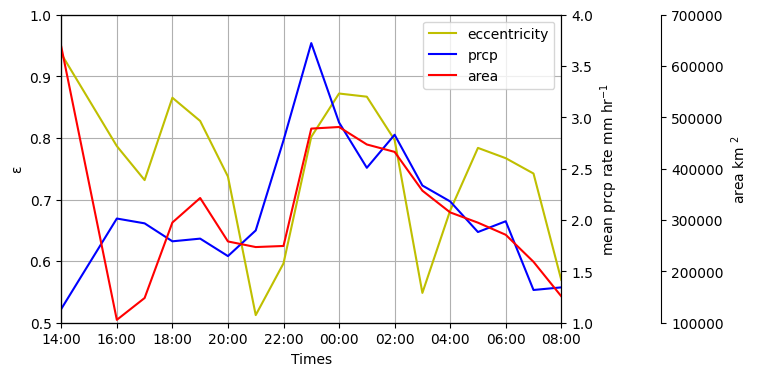

In [33]:
fig, ax = plt.subplots(figsize = (8, 4))
fig.subplots_adjust(right=0.75)
twin1 = ax.twinx()
twin2 = ax.twinx()
twin2.spines.right.set_position(("axes", 1.2))

start_time = pd.to_datetime("2017-07-15 14:00:00")
end_time = pd.to_datetime("2017-07-16 08:00:00")

p1, = ax.plot(track['time'], track['eccentricity'], color='y', label='eccentricity')
p2, = twin1.plot(track['time'], track['mean_pr'], color='b', label='prcp')
p3, = twin2.plot(track['time'], track['area(km2)'], color='r', label='area')


ax.set_xlabel("Times")
ax.set_ylabel("ε")
twin1.set_ylabel("mean prcp rate mm hr$^{-1}$")
twin2.set_ylabel("area km $^{2}$")


ax.set_ylim(0.5, 1)
twin1.set_ylim(1, 4)
twin2.set_ylim(100000, 700000)
ax.set_xlim([start_time, end_time])


ax.legend(handles=[p1, p2, p3], loc='upper right')
ax.grid(True)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

output = 'D:/PAPERBANJIR/OUTPUT/REVISI_NEW/'
plt.savefig(os.path.join(output, 'revisi_eccentricity.png'), bbox_inches='tight', dpi=900)